In [97]:
import os
import json
import warnings
import cv2
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle

warnings.filterwarnings('ignore')

In [158]:
DATASET_PATH = '../dataset_its'
TRAIN_PATH = os.path.join(DATASET_PATH, 'train')
TEST_PATH = os.path.join(DATASET_PATH, 'test')
MASK_PATH = os.path.join(DATASET_PATH, 'mask')

In [3]:
print('Images in TRAIN path {}\nImages in TEST path {}'.format(len([file for file in os.listdir(TRAIN_PATH) if file.endswith('.png')]), 
                                                               len(os.listdir(TEST_PATH))))

Images in TRAIN path 261
Images in TEST path 107


dict_keys(['shapes', 'imageHeight', 'imageWidth'])
height = 512, width = 640
LABEL = staphylococcus_epidermidis
(512, 640, 3)


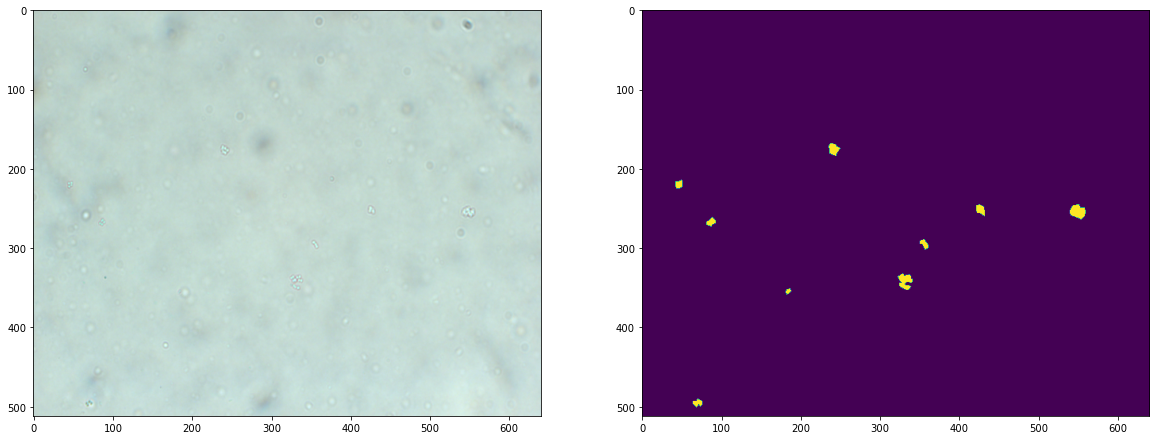

In [194]:
img = None
train_files = [os.path.join(TRAIN_PATH, f) for f in os.listdir(TRAIN_PATH)]
shuffle(train_files)
for f in train_files:
    if f.endswith('.png'):
        img = io.imread(f)
        with open(f[:-4] + '.json', 'r') as json_file:
            layout = json.load(json_file)
            print(layout.keys())
            h, w = layout['imageHeight'], layout['imageWidth']
            true_mask = np.zeros((h, w), np.uint8)
            label = layout['shapes'][0]['label']
            for shape in layout['shapes']:
                polygon = np.array([point[::-1] for point in shape['points']])
                cv2.fillPoly(true_mask, [polygon[:, [1, 0]]], 255)
            print(f'height = {h}, width = {w}')
            print(f'LABEL = {label}')
        break
print(img.shape)
fig, ax = plt.subplots(1,2, figsize=(20,15))
ax[0].imshow(img)
ax[1].imshow(true_mask);

[  0 255]


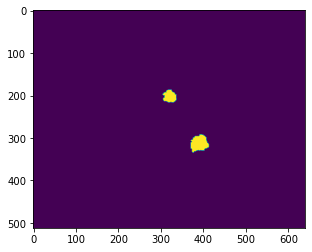

In [192]:
mask_files = os.listdir(MASK_PATH)
shuffle(mask_files)
for mask in mask_files:
    img = io.imread(os.path.join(MASK_PATH, mask))
    print(np.unique(img))
    break
plt.imshow(img);